Questions I wasnt to ask
What countries have the best ratings for their shows and movies?
movies 


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

In [87]:
df = pd.read_csv("netflix_titles.csv")


In [88]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [89]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

## Filling Nulls

In [90]:
df['director'] = df['director'].fillna('Unknown')

In [91]:
df['cast'] =df['cast'].fillna('Unknown')

In [92]:
df['country'] = df['country'].fillna('Unknown')

##

In [93]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'Total Show count according to type')

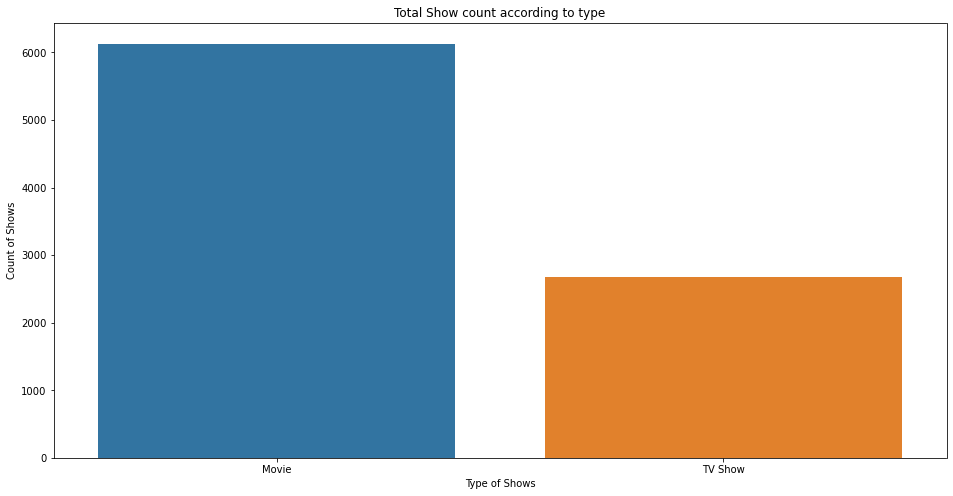

In [171]:
plt.figure(figsize=(16,8))
sns.countplot(x='type', data=df)
plt.xlabel('Type of Shows')
plt.ylabel('Count of Shows')
plt.title('Total Show count according to type')

#### Shows How Many Movies/Shows The Top Ten Countries Have Produced on Netflix from 1999 to 2021.

In [172]:
df['country'].value_counts().sort_values(ascending= False).head(11)


United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

top 10 countries with highest number of content over the years

In [199]:
top_10 = df.groupby('country').count().reset_index().sort_values(ascending=False,by='show_id')[0:11]['country']
top_10_df = df[df['country'].isin(top_10)]

(1970.0, 2020.0)

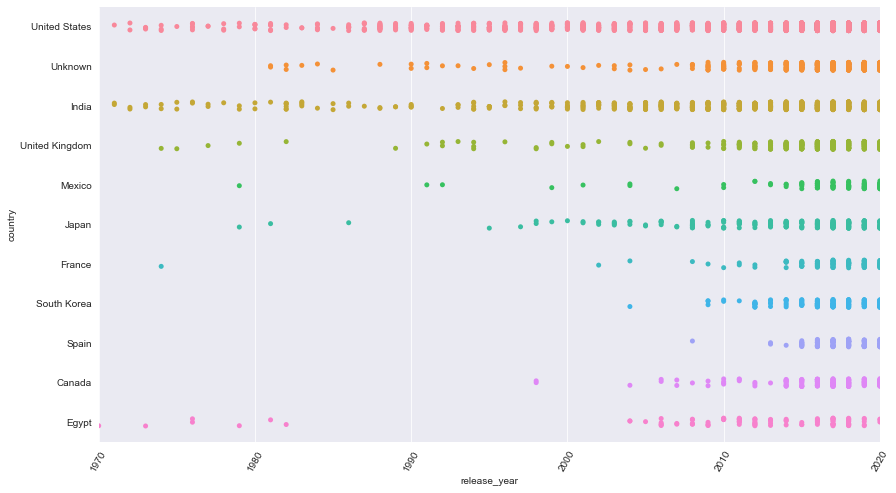

In [200]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,8))
sns.stripplot(y='country', x='release_year', data=top_10_df)
sns.despine(left=True)
plt.xticks(rotation=60)
plt.xlim(1970,2020)

In [201]:
# df.groupby(df.country)[df.title]

Documentaries = df.listed_in.str.contains(r'Documentaries')
Total_Documentaries = df[Documentaries].listed_in.value_counts().sum()

Thrillers = df.listed_in.str.contains(r'Thrillers')
Total_Thrillers = df[Thrillers].listed_in.value_counts().sum()

Comedies = df.listed_in.str.contains(r'Comedies')
Total_Comedies = df[Comedies].listed_in.value_counts().sum()

Dramas = df.listed_in.str.contains(r'Dramas')
Total_Dramas = df[Dramas].listed_in.value_counts().sum()

Action = df.listed_in.str.contains(r'Action')
Total_Action = df[Action].listed_in.value_counts().sum()

Horror = df.listed_in.str.contains(r'Horror')
Total_Horror = df[Horror].listed_in.value_counts().sum()

results_df = pd.DataFrame( {
        "Type": ["Documentaries", "Thrillers", "Comedies","Dramas","Action","Horror"],
        "Count": [Total_Documentaries, Total_Thrillers, Total_Comedies, Total_Dramas, Total_Action, Total_Horror] }
        )
results_df

,Type,Count
0,Documentaries,869
1,Thrillers,634
2,Comedies,2255
3,Dramas,3190
4,Action,1027
5,Horror,432


In [202]:
pd.df(df.groupby('released_year'))

AttributeError: module 'pandas' has no attribute 'df'